**Brendan Collari**

**Project 1**

**DSE5002 Data Project #1**

**Scenario**

Your CEO has decided that the company needs a full-time data scientist, and possibly a team of them in the future. She thinks she needs someone who can help drive data science within the entire organization and could potentially lead a team in the future. She understands that data scientist salaries vary widely across the world and is unsure what to pay them. To complicate matters, salaries are going up due to the great recession and the market is highly competitive. Your CEO has asked you to prepare an analysis on data science salaries and provide them with a range to be competitive and get top talent.

The position can work offshore, but the CEO would like to know what the difference is for a person working in the United States. Your company is currently a small company but is expanding rapidly.

**Deliverables**

Prepare your analysis in a Jupyter notebook. Your final product should be a PowerPoint (or Google Slides) presentation giving your recommendation to the CEO. CEOs do not care about your code and don't want to see it. They want to see visuals and a well-thought-out analysis. They also want very concise presentations, the total length must be 4 to 6 pages in PowerPoint.
Note: You can add an appendix after the end of the main presentation, if there are details that just don't fit into the main presentation. The appendix, if used, must be clearly as an appendix. The appendix does not count toward the grade.

Use of an appendix like this in a "real world" presentation allows you to have a highly professional way to answer questions you think your audience may ask by pulling up a table or graphic related to that question.

You will need to turn in the Presentation deck and the code as a Jupyter Notebook in pdf format.


**Meet with team**

How can we take this data and make some visualizations to tell a story to the CEO that wants a full time data scientist and maybe more in the future? 

We need to figure out what jobs are good enough for a data scientist, can a data engineer be enough or a machine learning scienctist?

What we can pay them that matches averages? 

We also want top talent, we dont want an entry level data scientist to be the head of the program, we probably want to start with a senior level

FInd some more questions and figure out how to visualize them 

Understand the CEO’s Perspective
A CEO wants clear, actionable insights to make hiring decisions. The presentation should:
- Highlight the need for a senior-level data scientist to start the program.
- Show salary expectations and trends to inform budgeting.
- Provide insights into hiring additional roles (e.g., junior or mid-level) in the future.
- Use clean, professional visuals that are easy to interpret.

**Exploratory Data Analysis**

*What question is being asked, what are we after here, what do we want to do??*

*What forms of analysis should we use? WHat visualizations?*

Some things to think about:
-What types of data are in each column
-What is the "key" or "identifier variable"-   it may be a composite key of several columns (first name, middle name, last name for example)
-What is the range of each variable?  What is the min, max, mean, median, standard deviation?
-What does the histogram of each variable look like?   Is it a bell curve (aka normal or gaussian)
-For grouping variables or categories (such as customer segments, age ranges, genders, etc) how many distinct categories do you have of each?
-How much data is missing?   (If any)
-Which variables are strongly correlated with other variables, indicating a strong positive or negative relationship between them.
-What do some basic, simple graphs of the data look like?

**Just load in data**
find path then load and see variables 

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os

In [4]:
import tkinter as tk
from tkinter import filedialog
 
root = tk.Tk()
root.withdraw()
file_path = filedialog.askopenfilename()

infile=file_path

print(infile)

/Users/brendan/Documents/DSE5002/Project_01/project_1_data.csv


In [5]:
pjdf=pd.read_csv(infile,encoding="latin1")

In [6]:
pjdf.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [7]:
pjdf.shape

(607, 12)

In [8]:
pjdf.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

**Data types comments**

the data has 607 rows and 12 columns 

work_year is a numerical representation of the year, only using the year 

experience_level is text data representing the levels of experience but these are abbrivated, when presenting to CEO change abbreviations. SE=senior ML=Mid-level 

emplyoment_type also text data represneitng FT for full time and PT for part time, should be treated as categorical so want to convert

job_title is also text representing the job title. I believe you will have to do some searching for these titles and salaries and skills/abilities of each of these

salary is an interger of the local currency 

salary_currency is text and represents the currency of the salary column, this is categorical so should be converted 

salary_in_usd is integer data that represnets the salary in USD, will be important 

employee_residence is text data representing the place where the emplyoee lives, should be treated as categorical and probably want to convert 

remote_ratio is an interger that represents a percentage 0, 50, 100 which indicates the amount of remote work an employee does, should be into a more descriptive categorical 

company_location is text that represnts where a company is located and should be converted to categorical data 

company_size is text data representing the size of the company S for small(>50), M for medium(50-250) and L for large (+250), can be converted to an ordered categorical type 

In [9]:
pjdf.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [10]:
missing_counts = pjdf.isnull().sum()

print(missing_counts)

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


**No missing counts**
This makes sense because the counts seem to be consistent in the .describe() 

**Converting to categorical vriables**

Right now some of the variables are objects and they should be categorical data, we can convert these to categories so they are easier to sort slice and graph  

In [11]:
# Convert to categorical
pjdf['experience_level'] = pjdf['experience_level'].astype('category')
pjdf['employment_type'] = pjdf['employment_type'].astype('category')
pjdf['salary_currency'] = pjdf['salary_currency'].astype('category')
pjdf['employee_residence'] = pjdf['employee_residence'].astype('category')
pjdf['company_location'] = pjdf['company_location'].astype('category')

# Ordered categorical for company_size
from pandas.api.types import CategoricalDtype
company_size_order = CategoricalDtype(categories=["S", "M", "L"], ordered=True)
pjdf['company_size'] = pjdf['company_size'].astype(company_size_order)

In [12]:
pjdf.dtypes

Unnamed: 0               int64
work_year                int64
experience_level      category
employment_type       category
job_title               object
salary                   int64
salary_currency       category
salary_in_usd            int64
employee_residence    category
remote_ratio             int64
company_location      category
company_size          category
dtype: object

In [13]:
pjdf["experience_level"].nunique()

4

In [14]:
pjdf["employment_type"].nunique()

4

In [16]:
pjdf["salary_currency"].nunique()

17

In [18]:
pjdf["employee_residence"].nunique()

57

In [19]:
pjdf["company_location"].nunique()

50

In [20]:
pjdf["company_size"].unique()

['L', 'S', 'M']
Categories (3, object): ['S' < 'M' < 'L']

In [22]:
pjdf.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


**Working Graphics**

Just getting some trends, not trying to make any high quality graphics 

{'whiskers': [<matplotlib.lines.Line2D at 0x13d6ed310>,
 'caps': [<matplotlib.lines.Line2D at 0x13d6efc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x13d4f7890>],
 'medians': [<matplotlib.lines.Line2D at 0x13d6efed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13d740050>],
 'means': []}

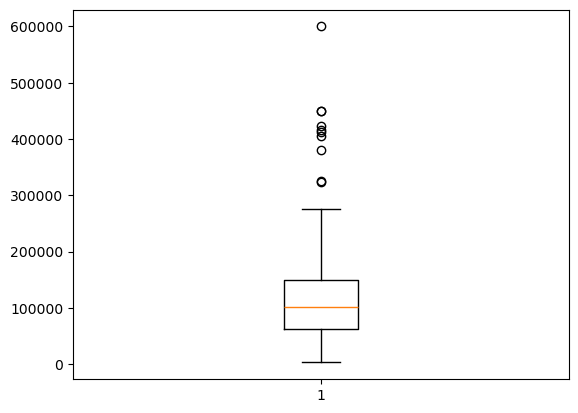

In [24]:
#Boxplot

plt.boxplot(pjdf["salary_in_usd"])

We can see the avergae salary in usd is around 100,000, with some outliers making a lot more than that. We also will have to filter this data later to only get the jobs we want like data scienctist 

(array([149., 228., 149.,  61.,  10.,   2.,   4.,   3.,   0.,   1.]),
 array([  2859. ,  62573.1, 122287.2, 182001.3, 241715.4, 301429.5,
        361143.6, 420857.7, 480571.8, 540285.9, 600000. ]),
 <BarContainer object of 10 artists>)

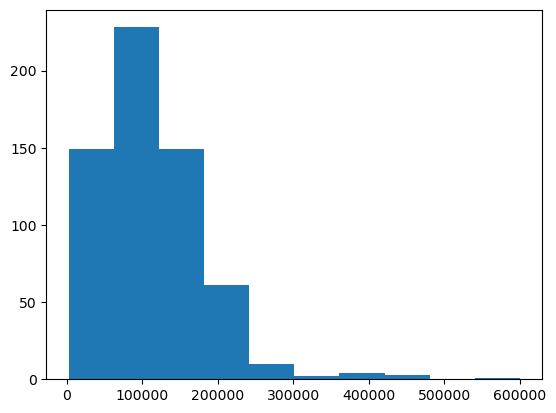

In [25]:
#histogram 

plt.hist(pjdf["salary_in_usd"])

Not a bad visual to see that amount of jobs at each salary 

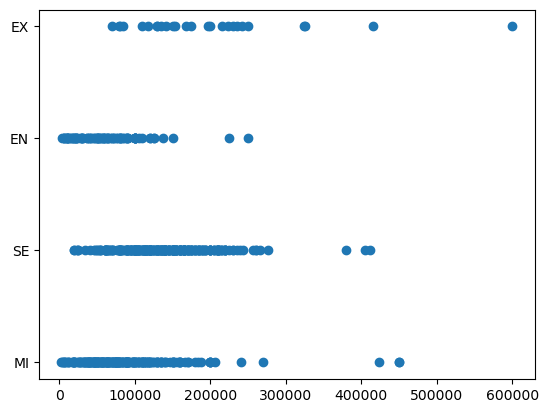

In [31]:
# biplot of experience level and salary in usd

plt.scatter(pjdf["salary_in_usd"],pjdf["experience_level"])

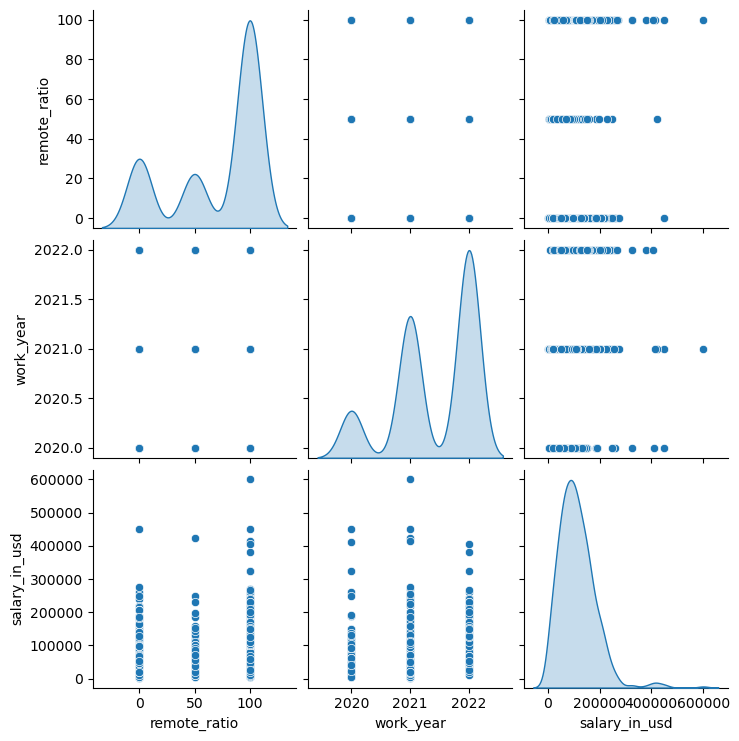

In [35]:
#Pair plots 
import seaborn as sns

sns.pairplot(pjdf[["remote_ratio","work_year","salary_in_usd","experience_level"]],diag_kind="kde")
plt.show()

Not the best visuals from the pair plot 

               remote_ratio  work_year  salary_in_usd
remote_ratio       1.000000   0.076314       0.132122
work_year          0.076314   1.000000       0.170493
salary_in_usd      0.132122   0.170493       1.000000


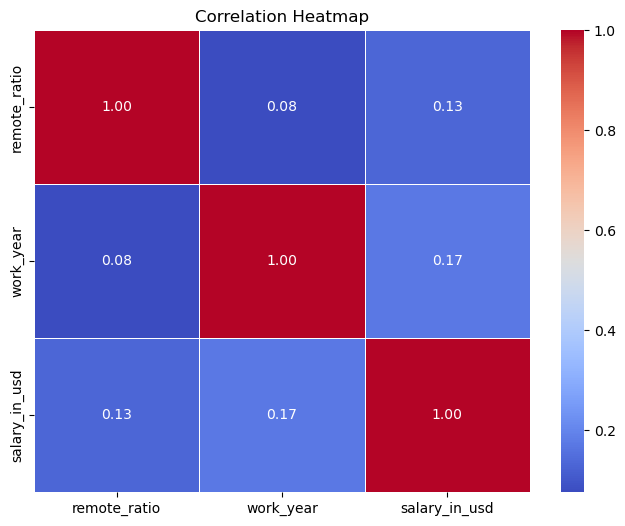

In [33]:
#heatmap 

corr_matrix = pjdf[["remote_ratio","work_year","salary_in_usd"]].corr(method='pearson')

print(corr_matrix)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

**Slicing and Sorting**

Uisng pandas to select and filter out and sort the data.

We can group data and calculate values within those groups. 



In [37]:
pjdf.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [39]:
tempdf=pjdf[['work_year','job_title',"salary_in_usd"]]

tempdf.head()

,work_year,job_title,salary_in_usd
0,2020,Data Scientist,79833
1,2020,Machine Learning Scientist,260000
2,2020,Big Data Engineer,109024
3,2020,Product Data Analyst,20000
4,2020,Machine Learning Engineer,150000


In [43]:
#selecting by number using .iloc

#.iloc stands for integer location, we specify a set of rows, then a set of columns

# the command below is the rows 0,1,2,3,4 and column 1

temp_df=pjdf.iloc[0:5,4]

temp_df

0                Data Scientist
1    Machine Learning Scientist
2             Big Data Engineer
3          Product Data Analyst
4     Machine Learning Engineer
Name: job_title, dtype: object

In [44]:
## combining loc and iloc

temp_df=pjdf.loc[ :,["salary_in_usd","job_title"]].iloc[0:10,:]

temp_df

,salary_in_usd,job_title
0,79833,Data Scientist
1,260000,Machine Learning Scientist
2,109024,Big Data Engineer
3,20000,Product Data Analyst
4,150000,Machine Learning Engineer
5,72000,Data Analyst
6,190000,Lead Data Scientist
7,35735,Data Scientist
8,135000,Business Data Analyst
9,125000,Lead Data Engineer


**Filtering**

Here we want to take a number of columns and limit the rows to certiain conditions 

Here we could filter out experience_level to be SE or EX beacuse the CEO wants to hire someone that has experience, we do not want to hire someone that is new as our first employee 

We could also filter for salries in the US in company_location because we will want to see the difference in comapnies in the US and not 

In [72]:
pjdf.sort_values("salary_in_usd")

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
176,176,2021,MI,FT,Data Scientist,58000,MXN,2859,MX,0,MX,S
238,238,2021,EN,FT,Data Scientist,4000,USD,4000,VN,0,VN,M
185,185,2021,MI,FT,Data Engineer,4000,USD,4000,IR,100,IR,M
77,77,2021,MI,PT,3D Computer Vision Researcher,400000,INR,5409,IN,50,IN,M
179,179,2021,MI,FT,Data Scientist,420000,INR,5679,IN,100,US,S
...,...,...,...,...,...,...,...,...,...,...,...,...
225,225,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
157,157,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
33,33,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
97,97,2021,MI,FT,Financial Data Analyst,450000,USD,450000,US,100,US,L


In [75]:
pjdf[["salary_in_usd","employee_residence"]].groupby(["employee_residence"]).apply("mean")

/var/folders/q7/__50m1f56731kgkgl7ffx9d80000gn/T/ipykernel_19575/446972987.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pjdf[["salary_in_usd","employee_residence"]].groupby(["employee_residence"]).apply("mean")


,salary_in_usd
employee_residence,
AE,100000.000000
AR,60000.000000
AT,76738.666667
AU,108042.666667
BE,85699.000000
BG,80000.000000
BO,75000.000000
BR,54634.666667
CA,97085.310345


In [76]:
#We can use multiple groupings, say Country and Headquarters

pjdf[["salary_in_usd","employee_residence","company_location"]].groupby(["employee_residence","company_location"]).apply("count")

/var/folders/q7/__50m1f56731kgkgl7ffx9d80000gn/T/ipykernel_19575/1223116149.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pjdf[["salary_in_usd","employee_residence","company_location"]].groupby(["employee_residence","company_location"]).apply("count")


salary_in_usd
employee_residence company_location               
AE                 AE                            3
                   AS                            0
                   AT                            0
                   AU                            0
                   BE                            0
...                                            ...
VN                 SI                            0
                   TR                            0
                   UA                            0
                   US                            1
                   VN                            1

[2850 rows x 1 columns]

In [79]:
pjdf[pjdf['company_location'] == 'US'].groupby('experience_level')['salary_in_usd'].mean().reset_index()


/var/folders/q7/__50m1f56731kgkgl7ffx9d80000gn/T/ipykernel_19575/1359077398.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pjdf[pjdf['company_location'] == 'US'].groupby('experience_level')['salary_in_usd'].mean().reset_index()


,experience_level,salary_in_usd
0,EN,93112.903226
1,EX,243742.187500
2,MI,125780.211111
3,SE,151527.633028


**Slide 1**

Want to create a bar plot with a trend line showing average salaries in USD of potential canidates for the position we are looking for. We need a 'data scienctist' so we want to filter out all the other roles that are not a data scientist or something along those lines, like a 'principal data scienctist' of a 'head of data science'.

In [49]:
#Senior and ex filtering so we only look at people we would be willing to hire
senior_and_up_salaries = pjdf[pjdf['experience_level'].isin(['EX', 'SE'])]


print(senior_and_up_salaries.head())

   Unnamed: 0  work_year experience_level employment_type  \
1           1       2020               SE              FT   
2           2       2020               SE              FT   
4           4       2020               SE              FT   
6           6       2020               SE              FT   
9           9       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
4   Machine Learning Engineer  150000             USD         150000   
6         Lead Data Scientist  190000             USD         190000   
9          Lead Data Engineer  125000             USD         125000   

  employee_residence  remote_ratio company_location company_size  
1                 JP             0               JP            S  
2                 GB            50               GB            M  

We can see here that when we look at the salary in usd most of them are above 100000 but below 200000 which we also saw earlier in the boxplot, but this time we are filtering out all the people that are below senior level work experience. This df could be useful later on when wanting to hire an inital staff. 

In [57]:
#filter out only US jobs so we can get a gage of what US salaires are 
#verse foreign salaries

us_salaries = pjdf[pjdf['company_location'] == 'US']

# Display the first 5 rows of this new DataFrame to confirm the filter worked
print(us_salaries.head())
us_salaries.describe()

    Unnamed: 0  work_year experience_level employment_type  \
4            4       2020               SE              FT   
5            5       2020               EN              FT   
6            6       2020               SE              FT   
8            8       2020               MI              FT   
13          13       2020               MI              FT   

                    job_title  salary salary_currency  salary_in_usd  \
4   Machine Learning Engineer  150000             USD         150000   
5                Data Analyst   72000             USD          72000   
6         Lead Data Scientist  190000             USD         190000   
8       Business Data Analyst  135000             USD         135000   
13          Lead Data Analyst   87000             USD          87000   

   employee_residence  remote_ratio company_location company_size  
4                  US            50               US            L  
5                  US           100               US      

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,355.000000,355.000000,3.550000e+02,355.000000,355.000000
mean,337.873239,2021.552113,1.877160e+05,144055.261972,77.746479
std,175.382385,0.646123,6.148174e+05,69906.895041,39.922141
min,4.000000,2020.000000,1.200000e+04,5679.000000,0.000000
25%,187.500000,2021.000000,1.021000e+05,100000.000000,75.000000
50%,345.000000,2022.000000,1.366200e+05,135000.000000,100.000000
75%,492.000000,2022.000000,1.745000e+05,170000.000000,100.000000
max,606.000000,2022.000000,1.100000e+07,600000.000000,100.000000


In [51]:
#Can also filter out all jobs that are not data scientists
pjdf["job_title"].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [55]:
# Filter pjdf for data scientist job titles
pjdf_ds_jobs = pjdf[pjdf['job_title'].str.contains('Data Scientist|Head of Data Science|Director of Data Science|Lead Data Scientist|Principal Data Scientist', 
                                                    case=False, na=False)].copy()

In [56]:
print(pjdf_ds_jobs)

     Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
6             6       2020               SE              FT   
7             7       2020               MI              FT   
10           10       2020               EN              FT   
11           11       2020               MI              FT   
..          ...        ...              ...             ...   
592         592       2022               SE              FT   
593         593       2022               SE              FT   
596         596       2022               SE              FT   
598         598       2022               MI              FT   
599         599       2022               MI              FT   

               job_title    salary salary_currency  salary_in_usd  \
0         Data Scientist     70000             EUR          79833   
6    Lead Data Scientist    190000             USD         190000   
7         Data Scientist  11000000  

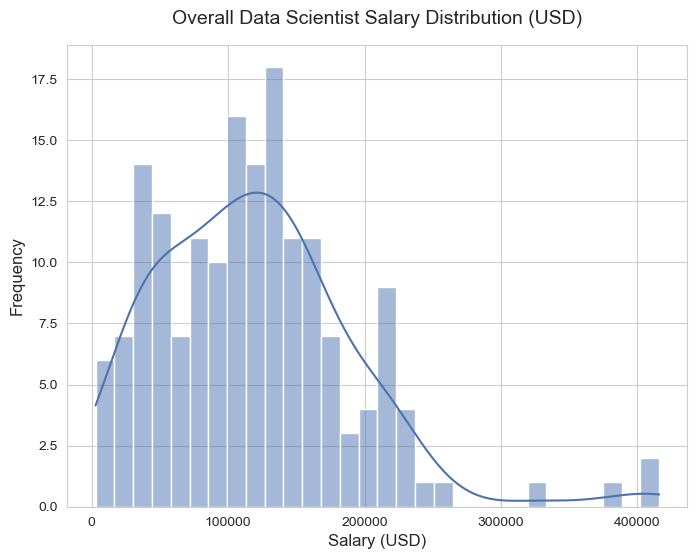

In [58]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("deep")
plt.figure(figsize=(8, 6))
sns.histplot(data=pjdf_ds_jobs, x='salary_in_usd', bins=30, kde=True)
plt.title('Overall Data Scientist Salary Distribution (USD)', fontsize=14, pad=15)
plt.xlabel('Salary (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.savefig('salary_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

The first graph

This graph was created by filtering out the jobs of Data Scientist and Head of Data Science and Director of Data Science and Lead Data Scientist and Principal Data Scientist because those are jobs we want to see as our first canadite. This is how much we should be paying the first hire on avergage. 

The average peaks just over 100,000 for Data science roles in USD

**Slide 2**
For slide two I want to create a plot that shows the average salry for each type of wokr expereince so we can get a good gage as to what we should be paying a senior level employee because that is what we do not want to overpay/underpay someone who deserves a certain amount. 

In [60]:
# Filter pjdf_ds_jobs for full-time roles and slice for experience_level, salary_in_usd
pjdf_exp_salary = pjdf_ds_jobs[pjdf_ds_jobs['employment_type'] == 'FT'][['experience_level', 'salary_in_usd']].copy()

# Set experience_level order for box plot
pjdf_exp_salary['experience_level'] = pd.Categorical(pjdf_exp_salary['experience_level'], 
                                                    categories=['EN', 'MI', 'SE', 'EX'], 
                                                    ordered=True)

# Verify the sliced data
print("Shape of data for Slide 2 (Salary by Experience Level, Full-Time):", pjdf_exp_salary.shape)
print("Sample of data:")
print(pjdf_exp_salary.head())
print("\nSummary of salary by experience level (Full-Time):")
print(pjdf_exp_salary.groupby('experience_level')['salary_in_usd'].describe())

Shape of data for Slide 2 (Salary by Experience Level, Full-Time): (165, 2)
Sample of data:
   experience_level  salary_in_usd
0                MI          79833
6                SE         190000
7                MI          35735
10               EN          51321
11               MI          40481

Summary of salary by experience level (Full-Time):
                  count           mean           std      min        25%  \
experience_level                                                           
EN                 21.0   57411.809524  31831.749397   4000.0   36643.00   
MI                 64.0   84524.781250  47460.349965   2859.0   44869.25   
SE                 71.0  158119.704225  63807.222379  20171.0  121580.00   
EX                  9.0  186043.666667  72144.927218  85000.0  141846.00   

                       50%        75%       max  
experience_level                                 
EN                 51321.0   86703.00  110037.0  
MI                 78916.5  119294.25  

/var/folders/q7/__50m1f56731kgkgl7ffx9d80000gn/T/ipykernel_19575/980142901.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(pjdf_exp_salary.groupby('experience_level')['salary_in_usd'].describe())


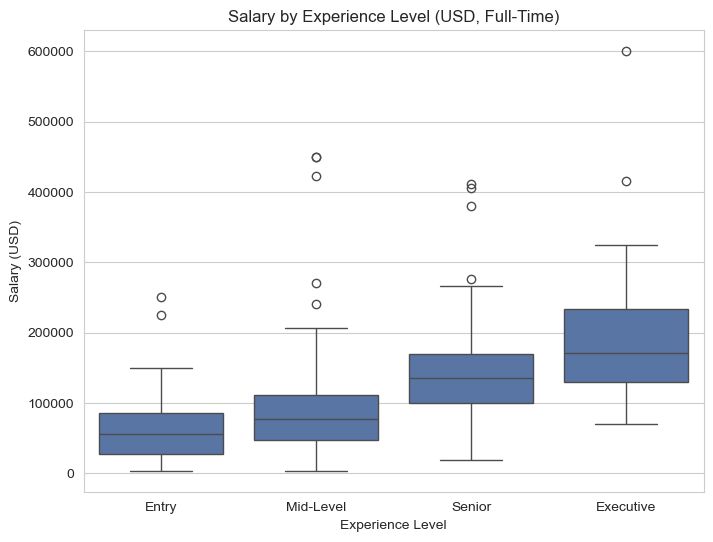

In [92]:
# Create the figure and axes for the plot
plt.figure(figsize=(8, 6))

sns.boxplot(data=pjdf, x='experience_level', y='salary_in_usd', order=['EN', 'MI', 'SE', 'EX'])

plt.title('Salary by Experience Level (USD, Full-Time)')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')

plt.xticks(ticks=[0, 1, 2, 3], labels=['Entry', 'Mid-Level', 'Senior', 'Executive'])

plt.savefig('salary_boxplot_exp_ft.png', dpi=300, bbox_inches='tight')

plt.show()

Graph number 2, this graph shows the average salary in USD based on experience level, this graph aslo takes into account full time workers only because we do not need a part time employee to start we want full time. 


Could make this graph a little better though 

/var/folders/q7/__50m1f56731kgkgl7ffx9d80000gn/T/ipykernel_19575/4008085248.py:10: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:0.25'` for the same effect.

  sns.swarmplot(x='experience_level', y='salary_in_usd', hue='company_size', data=pjdf, color='0.25', dodge=True)
/var/folders/q7/__50m1f56731kgkgl7ffx9d80000gn/T/ipykernel_19575/4008085248.py:23: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(handles[:3], labels[:3], title='Company Size', loc='upper left', labels=['Small (S)', 'Medium (M)', 'Large (L)'])


Box plot with swarm plot saved as 'salary_distribution_by_exp_and_size.png'


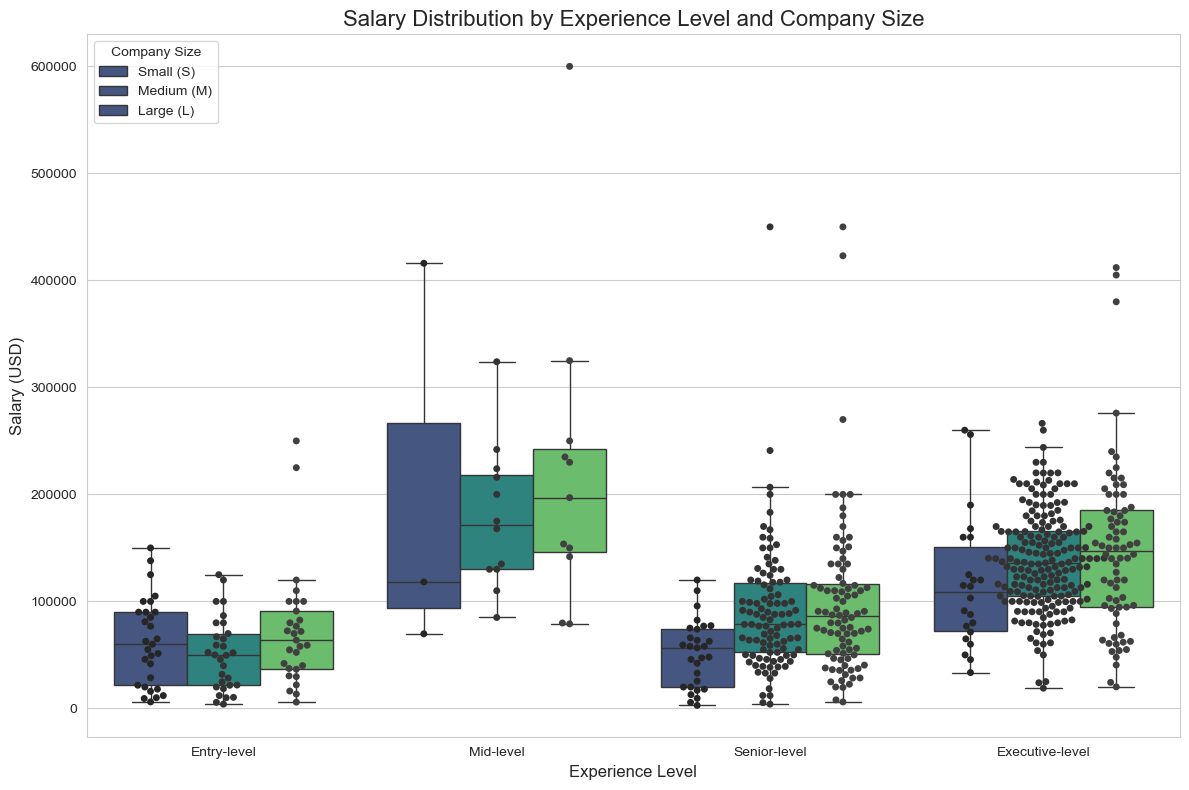

In [82]:
# Create the figure and axes for the plot
plt.figure(figsize=(12, 8))

# Use Seaborn to create a box plot. This visualizes the distribution of salaries
# for each experience level, without being skewed by a small number of data points.
sns.boxplot(x='experience_level', y='salary_in_usd', hue='company_size', data=pjdf, palette='viridis', fliersize=0)

# Add a swarm plot on top to show every individual data point. This visually
# demonstrates the small sample size for the 'EX' category.
sns.swarmplot(x='experience_level', y='salary_in_usd', hue='company_size', data=pjdf, color='0.25', dodge=True)

# Add titles and labels for clarity
plt.title('Salary Distribution by Experience Level and Company Size', fontsize=16)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)

# Improve x-axis labels to be more descriptive for the CEO
plt.xticks(ticks=[0, 1, 2, 3], labels=['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level'])

# The legend for the swarmplot is redundant, so we get rid of it.
# We also update the legend for the boxplot to be more clear.
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:3], labels[:3], title='Company Size', loc='upper left', labels=['Small (S)', 'Medium (M)', 'Large (L)'])


plt.tight_layout() # Adjust layout to prevent labels from overlapping

# Save the plot as a high-quality image for your presentation
plt.savefig('salary_distribution_by_exp_and_size.png')
print("Box plot with swarm plot saved as 'salary_distribution_by_exp_and_size.png'")

# Display the plot
plt.show()

I do not know if i like this one better, the mid level does not have a lot of counts so it skews the data showing a bad visual for the CEO. We will stick with the less complicated graph to really hit home on the story i am trying to tell

In [66]:
#create a table for this data 
# Filter pjdf_ds_jobs for full-time roles, select experience_level and salary_in_usd
pjdf_exp_salary_ft = pjdf_ds_jobs[pjdf_ds_jobs['employment_type'] == 'FT'][['experience_level', 'salary_in_usd']].copy()

# Create summary table
slide2_table = pjdf_exp_salary_ft.groupby('experience_level')['salary_in_usd'].describe()[['count', 'mean', '50%', 'min', 'max']].round(0).astype(int)

# Rename columns for clarity
slide2_table.columns = ['Count', 'Mean Salary (USD)', 'Median Salary (USD)', 'Min Salary (USD)', 'Max Salary (USD)']

slide2_table.to_csv('slide2_salary_by_exp.csv')

print("Slide 2 Table: Salary by Experience Level (Full-Time)")
print(slide2_table)

Slide 2 Table: Salary by Experience Level (Full-Time)
                  Count  Mean Salary (USD)  Median Salary (USD)  \
experience_level                                                  
EN                   21              57412                51321   
EX                    9             186044               167875   
MI                   64              84525                78916   
SE                   71             158120               148261   

                  Min Salary (USD)  Max Salary (USD)  
experience_level                                      
EN                            4000            110037  
EX                           85000            325000  
MI                            2859            200000  
SE                           20171            412000  


/var/folders/q7/__50m1f56731kgkgl7ffx9d80000gn/T/ipykernel_19575/310344104.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  slide2_table = pjdf_exp_salary_ft.groupby('experience_level')['salary_in_usd'].describe()[['count', 'mean', '50%', 'min', 'max']].round(0).astype(int)


**Slide 3** 

For slide 3 i want to create a violin plot that shows the comparison of US vs non-US salries of the Data scienctist, SE or EX positions. This will show the CEO the difference between someone working off shore and someone working within the US. 

In [62]:
# Filter pjdf_ds_jobs for SE/EX roles, select columns
pjdf_se_ex_us = pjdf_ds_jobs[pjdf_ds_jobs['experience_level'].isin(['SE', 'EX'])][['experience_level', 'salary_in_usd', 'company_location']].copy()

# Create US/non-US column
pjdf_se_ex_us['is_us'] = pjdf_se_ex_us['company_location'].apply(lambda x: 'US' if x == 'US' else 'Non-US')

# Verify the data
print("Shape for Slide 3 (SE/EX, US vs. Non-US):", pjdf_se_ex_us.shape)
print("Sample:")
print(pjdf_se_ex_us.head())
print("\nSummary by experience level and location:")
print(pjdf_se_ex_us.groupby(['experience_level', 'is_us'])['salary_in_usd'].describe())

Shape for Slide 3 (SE/EX, US vs. Non-US): (82, 4)
Sample:
   experience_level  salary_in_usd company_location   is_us
6                SE         190000               US      US
25               EX         325000               US      US
32               SE          68428               US      US
55               SE         148261               DE  Non-US
58               SE         120000               US      US

Summary by experience level and location:
                         count           mean           std       min  \
experience_level is_us                                                  
EX               Non-US    5.0  141503.600000  40465.966123   85000.0   
                 US        5.0  276575.000000  96268.326177  167875.0   
SE               Non-US   13.0  103805.461538  49418.823618   20171.0   
                 US       59.0  169186.915254  60590.967303   68428.0   

                              25%       50%       75%       max  
experience_level is_us            

/var/folders/q7/__50m1f56731kgkgl7ffx9d80000gn/T/ipykernel_19575/3220982892.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(pjdf_se_ex_us.groupby(['experience_level', 'is_us'])['salary_in_usd'].describe())


We can see from the table that for both SE positions and EX positions that the mean salary in the US is significantly higher than those off shore. we can create a violin plot to visualize this 

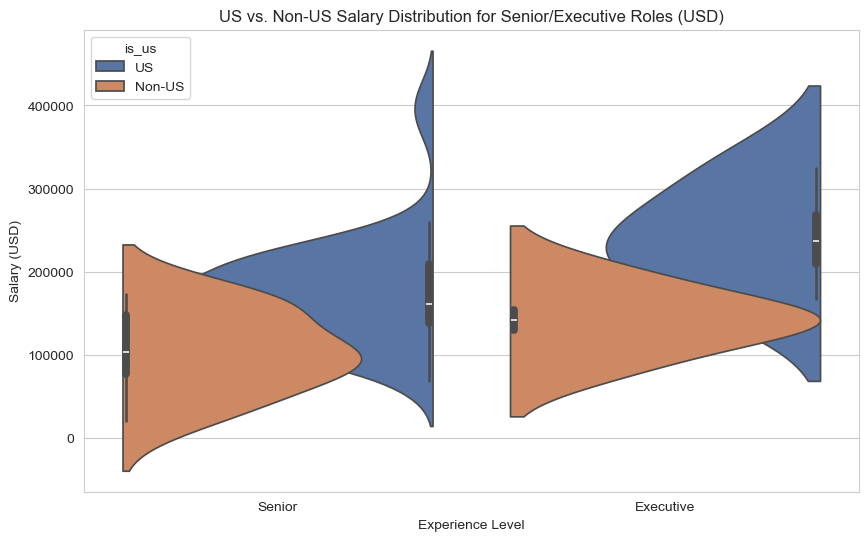

In [91]:

plt.figure(figsize=(10, 6))

sns.violinplot(data=pjdf_se_ex_us, x='experience_level', y='salary_in_usd', hue='is_us', split=True, order=['SE', 'EX'])

plt.title('US vs. Non-US Salary Distribution for Senior/Executive Roles (USD)')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')

plt.xticks(ticks=[0, 1], labels=['Senior', 'Executive'])

plt.savefig('salary_violin_se_ex_us.png', dpi=300, bbox_inches='tight')

plt.show()

In [67]:
#create a table for this data 

# Filter pjdf_ds_jobs for SE/EX roles, select columns
pjdf_se_ex_us = pjdf_ds_jobs[(pjdf_ds_jobs['experience_level'].isin(['SE', 'EX'])) & 
                             (pjdf_ds_jobs['employment_type'] == 'FT')][['experience_level', 'salary_in_usd', 'company_location']].copy()

# Create US/non-US column
pjdf_se_ex_us['is_us'] = pjdf_se_ex_us['company_location'].apply(lambda x: 'US' if x == 'US' else 'Non-US')

# Create summary table
slide3_table = pjdf_se_ex_us.groupby(['experience_level', 'is_us'])['salary_in_usd'].describe()[['count', 'mean', '50%']].round(0).astype(int)

# Rename columns
slide3_table.columns = ['Count', 'Mean Salary (USD)', 'Median Salary (USD)']

# Save as CSV
slide3_table.to_csv('slide3_salary_us_nonus.csv')

# Display
print("Slide 3 Table: US vs. Non-US Salaries for SE/EX (Full-Time)")
print(slide3_table)

Slide 3 Table: US vs. Non-US Salaries for SE/EX (Full-Time)
                         Count  Mean Salary (USD)  Median Salary (USD)
experience_level is_us                                                
EX               Non-US      5             141504               141846
                 US          4             241719               237000
SE               Non-US     13             103805               103691
                 US         58             170294               161600


/var/folders/q7/__50m1f56731kgkgl7ffx9d80000gn/T/ipykernel_19575/3768027877.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  slide3_table = pjdf_se_ex_us.groupby(['experience_level', 'is_us'])['salary_in_usd'].describe()[['count', 'mean', '50%']].round(0).astype(int)


Since the project description asks for two graphs and two tables, I believe the table will be good for slides 2 and 3 because you can still get clear and concise information from them. 

**Slide 4**

Salary trends over time, eventually we want a bigger team which will lead to this company needing to understand the trend of data scientist jobs over a period of time. We can use a line plot to show the rising salaries so that the CEO can offer a competative salary 

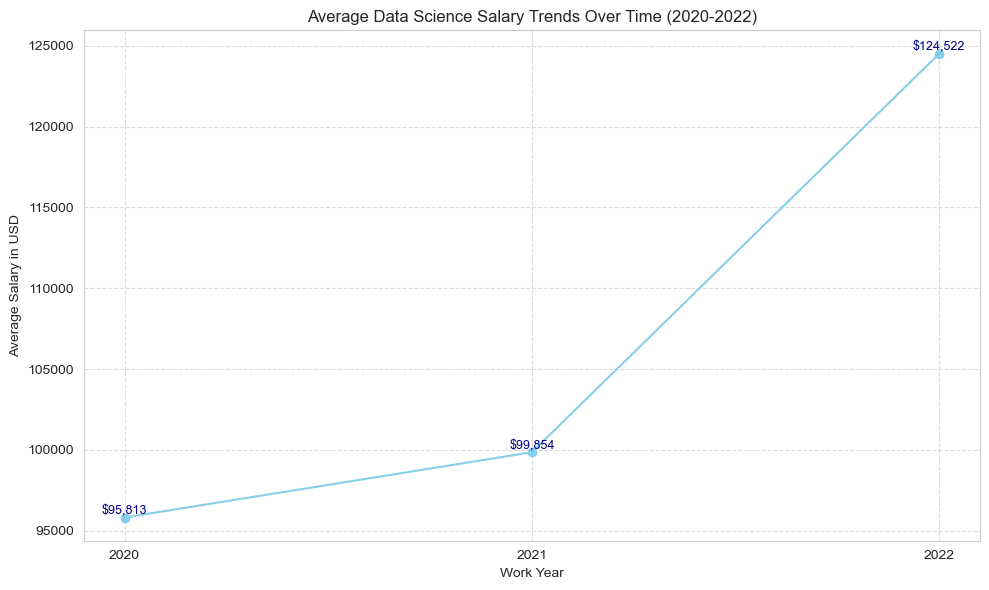

In [68]:
salary_trend = pjdf.groupby('work_year')['salary_in_usd'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(10, 6)) # Set the figure size for better readability
plt.plot(salary_trend['work_year'], salary_trend['salary_in_usd'], marker='o', linestyle='-', color='skyblue')

# Add titles and labels for clarity
plt.title('Average Data Science Salary Trends Over Time (2020-2022)')
plt.xlabel('Work Year')
plt.ylabel('Average Salary in USD')
plt.grid(True, linestyle='--', alpha=0.7) # Add a grid for easier reading of values
plt.xticks(salary_trend['work_year']) # Ensure all years are shown on the x-axis

# Annotate each point with its value for precise reading
for x, y in zip(salary_trend['work_year'], salary_trend['salary_in_usd']):
    plt.text(x, y, f'${y:,.0f}', ha='center', va='bottom', fontsize=9, color='darkblue')

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [69]:
salary_trend = pjdf.groupby('work_year')['salary_in_usd'].mean().reset_index()

# Rename columns for better readability in the table
salary_trend.columns = ['Work Year', 'Average Salary (USD)']

# Display the table
print("Average Data Science Salary Trends Over Time:")
print(salary_trend.to_string(index=False, formatters={'Average Salary (USD)': '${:,.0f}'.format}))

# Save the aggregated data to a CSV file
# This will create a file named 'salary_trend_table.csv' in the same directory as your notebook
# index=False prevents pandas from writing the DataFrame index as a column in the CSV
salary_trend.to_csv('salary_trend_table.csv', index=False)

Average Data Science Salary Trends Over Time:
 Work Year Average Salary (USD)
      2020              $95,813
      2021              $99,854
      2022             $124,522


This is a table and a line graph showing the increase over time of the average data science trends between 2020-2022. 


**Slide 5**
Can add in another slide which i am thinking will be that directly addresses your company's unique situation: being a small but rapidly expanding company. By creating a visual that shows how salary varies by company size and location, this will show us where we will eventually be going as a company that is small but growing 

/var/folders/q7/__50m1f56731kgkgl7ffx9d80000gn/T/ipykernel_19575/1819594109.py:10: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:0.25'` for the same effect.

  sns.swarmplot(x='company_size', y='salary_in_usd', hue='location_group', data=pjdf, color='0.25', dodge=True)


Box plot with swarm plot saved as 'salary_distribution_by_size_and_location.png'


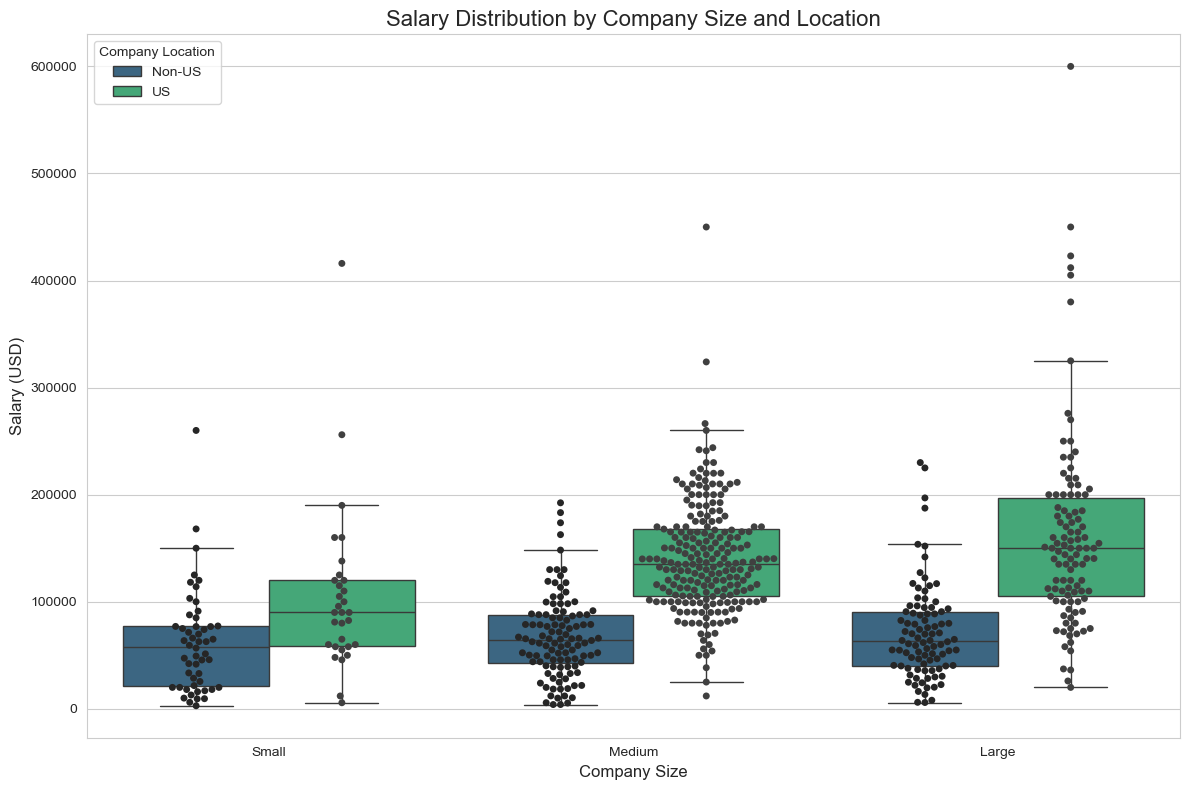

In [86]:
pjdf['location_group'] = pjdf['company_location'].apply(lambda x: 'US' if x == 'US' else 'Non-US')


plt.figure(figsize=(12, 8))

# Use Seaborn to create a box plot. This visualizes the distribution of salaries

sns.boxplot(x='company_size', y='salary_in_usd', hue='location_group', data=pjdf, palette='viridis', fliersize=0)

sns.swarmplot(x='company_size', y='salary_in_usd', hue='location_group', data=pjdf, color='0.25', dodge=True)


plt.title('Salary Distribution by Company Size and Location', fontsize=16)
plt.xlabel('Company Size', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)

plt.xticks(ticks=[0, 1, 2], labels=['Small', 'Medium', 'Large'])


handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title='Company Location', loc='upper left')

plt.tight_layout() 


plt.savefig('salary_distribution_by_size_and_location.png')
print("Box plot with swarm plot saved as 'salary_distribution_by_size_and_location.png'")

# Display the plot
plt.show()


*Swapping slides 4 and 5 to make the presentation flow better*

**Appendix**

Want to give a quick visual on percent of remote work and salry in usd, knowing that the CEO might want to hire a remote worker 

/var/folders/q7/__50m1f56731kgkgl7ffx9d80000gn/T/ipykernel_19575/1700048496.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='remote_ratio', y='salary_in_usd', data=pjdf, palette='viridis', jitter=True, size=5, alpha=0.7)


Strip plot saved as 'salary_distribution_by_remote_ratio_strip_plot.png'


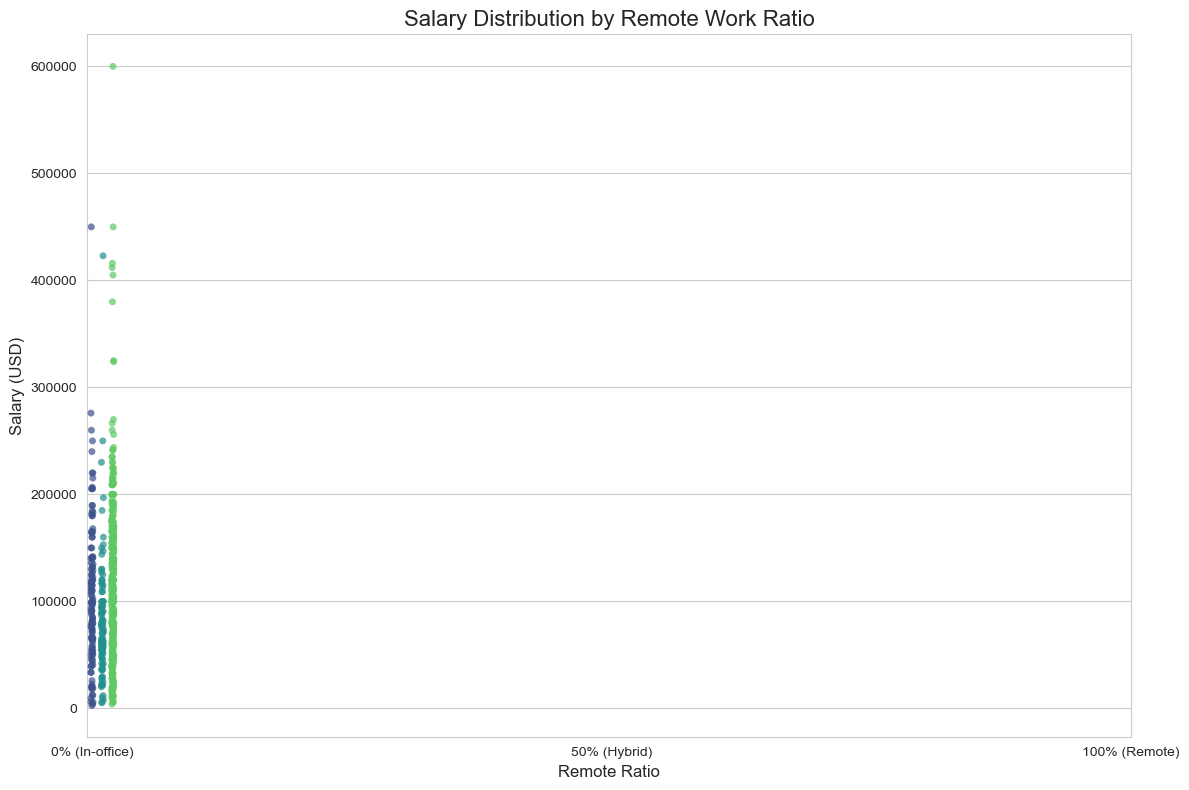

In [87]:
plt.figure(figsize=(12, 8))

sns.stripplot(x='remote_ratio', y='salary_in_usd', data=pjdf, palette='viridis', jitter=True, size=5, alpha=0.7)

plt.title('Salary Distribution by Remote Work Ratio', fontsize=16)
plt.xlabel('Remote Ratio', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)

plt.xticks(ticks=[0, 50, 100], labels=['0% (In-office)', '50% (Hybrid)', '100% (Remote)'])

plt.tight_layout() 

plt.savefig('salary_distribution_by_remote_ratio_strip_plot.png')
print("Strip plot saved as 'salary_distribution_by_remote_ratio_strip_plot.png'")

# Display the plot
plt.show()

Not what we are looking for, and I do not want to use another box-plot, going to try a catplot

/var/folders/q7/__50m1f56731kgkgl7ffx9d80000gn/T/ipykernel_19575/2864786746.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


Catplot saved as 'salary_distribution_by_remote_ratio_catplot.png'


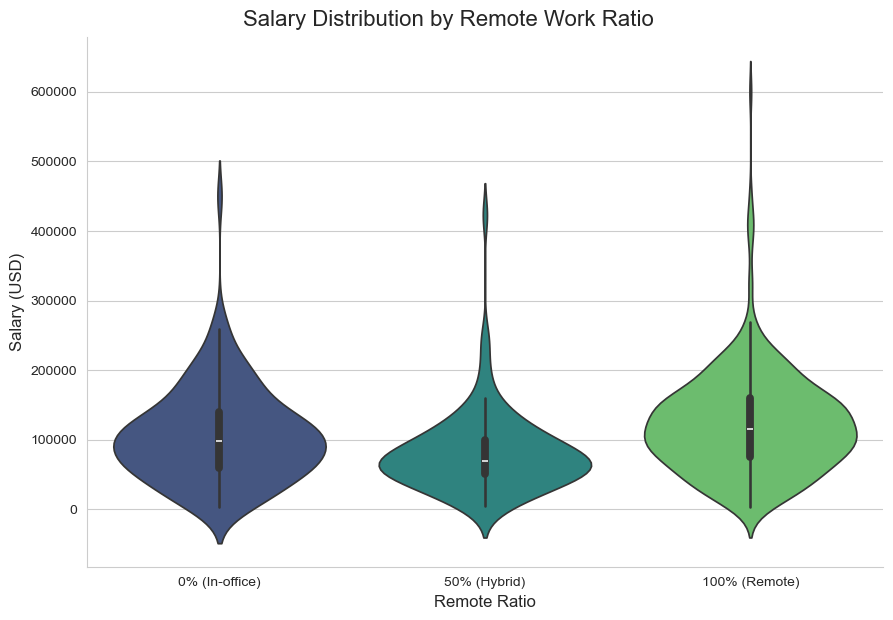

In [88]:
# Use seaborn.catplot() to create a figure-level plot.
# We set 'kind' to 'violin' to specify the type of plot we want.
g = sns.catplot(
    x='remote_ratio',
    y='salary_in_usd',
    data=pjdf,
    kind='violin',
    palette='viridis',
    height=6,
    aspect=1.5
)

# Set titles and labels on the FacetGrid object 'g'
g.fig.suptitle('Salary Distribution by Remote Work Ratio', fontsize=16, y=1.02)
g.set_axis_labels('Remote Ratio', 'Salary (USD)', fontsize=12)

# Improve x-axis labels to be more descriptive
g.set_xticklabels(['0% (In-office)', '50% (Hybrid)', '100% (Remote)'])

# Save the plot as a high-quality image for your presentation
g.savefig('salary_distribution_by_remote_ratio_catplot.png')
print("Catplot saved as 'salary_distribution_by_remote_ratio_catplot.png'")

# Display the plot
plt.show()


I kinda like this one for the appendix, shows the CEO there really is  not a need to pay someone in the office more than someone that works remote

**Story**

We need to hire a Data Scientist for the company and we eventually want a full team of data science staff. To start we must attract a high level data scientist or something along the lines of a data scientist and we need them to be Senior or Executive level. To start a competitive salary of 150,000-200,000 USD should be offered. The salary distribution for data science roles at their experience level is wide with Seniors averaging over 140,000 in USD and Executive level averaging over 160,000 in USD for full time work. Domestic based senior and executive roles have even higher medians than the global medians with the US being 160,000-230,000 in USD whereas those off shore sit around 100,000-140,000 in USD. So there is a premium for US talent. And the salary premium for US talent is evident across all the company sizes, small, medium and large but the data shows that a small company like ourselves have a wider salary range than those larger companies. We can have a little more flexibility to offer a competitive salary to top talent as a small company but will have to become data-driven in compensation strategy to align with the structured salary ranges of the larger companies. We can also see how overall, data science roles increase over time with a steady increase from 2021 to 2022. So the market is increasing and we will have to continue to account for these increases. Overall we want to make a strong offer to those who have experience and can work as a lead in a data science team. 